In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import json
import pprint
from Config import nasa_key
import datetime as dt

# Import API key
from Config import nasa_key

In [2]:
data = pd.read_csv('Data.csv')
data.head()

,Unnamed: 0,id,Asteroid Name,Potentially Hazardous,Miss Distance (miles),Orbiting Body,Close Approach Velocity (mph),Date,Max Diameter (meters)
0,0,2000433,433 Eros (A898 PA),False,2.927449e+07,Earth,12478.813260,1900-12-27,48982.390780
1,1,2000719,719 Albert (A911 TB),False,1.588405e+08,Juptr,7708.422020,1909-08-21,4529.392731
2,2,2000887,887 Alinda (A918 AA),False,2.979635e+07,Earth,15221.637890,1910-01-04,9954.970531
3,3,2001036,1036 Ganymed (A924 UB),False,1.818454e+08,Juptr,14101.118720,1910-02-25,83567.994282
4,4,2001221,1221 Amor (1932 EA1),False,2.649695e+07,Earth,29682.274467,1900-03-08,1986.277755


In [3]:
data.drop(columns=data.columns[0], axis=1, inplace=True)
data.head()

,id,Asteroid Name,Potentially Hazardous,Miss Distance (miles),Orbiting Body,Close Approach Velocity (mph),Date,Max Diameter (meters)
0,2000433,433 Eros (A898 PA),False,2.927449e+07,Earth,12478.813260,1900-12-27,48982.390780
1,2000719,719 Albert (A911 TB),False,1.588405e+08,Juptr,7708.422020,1909-08-21,4529.392731
2,2000887,887 Alinda (A918 AA),False,2.979635e+07,Earth,15221.637890,1910-01-04,9954.970531
3,2001036,1036 Ganymed (A924 UB),False,1.818454e+08,Juptr,14101.118720,1910-02-25,83567.994282
4,2001221,1221 Amor (1932 EA1),False,2.649695e+07,Earth,29682.274467,1900-03-08,1986.277755


In [4]:
data['Close Approach Velocity (mph)'] = data['Close Approach Velocity (mph)'].apply(lambda x: round(x, 2))
data['Max Diameter (meters)'] = data['Max Diameter (meters)'].apply(lambda x: round(x, 2))

data.head()

,id,Asteroid Name,Potentially Hazardous,Miss Distance (miles),Orbiting Body,Close Approach Velocity (mph),Date,Max Diameter (meters)
0,2000433,433 Eros (A898 PA),False,2.927449e+07,Earth,12478.81,1900-12-27,48982.39
1,2000719,719 Albert (A911 TB),False,1.588405e+08,Juptr,7708.42,1909-08-21,4529.39
2,2000887,887 Alinda (A918 AA),False,2.979635e+07,Earth,15221.64,1910-01-04,9954.97
3,2001036,1036 Ganymed (A924 UB),False,1.818454e+08,Juptr,14101.12,1910-02-25,83567.99
4,2001221,1221 Amor (1932 EA1),False,2.649695e+07,Earth,29682.27,1900-03-08,1986.28


In [5]:
data['Miss Distance (miles)'] = data['Miss Distance (miles)'].map(lambda x:('{:.2f}'.format(float(x))))

In [6]:
data.head(30)

,id,Asteroid Name,Potentially Hazardous,Miss Distance (miles),Orbiting Body,Close Approach Velocity (mph),Date,Max Diameter (meters)
0,2000433,433 Eros (A898 PA),False,29274494.77,Earth,12478.81,1900-12-27,48982.39
1,2000719,719 Albert (A911 TB),False,158840482.64,Juptr,7708.42,1909-08-21,4529.39
2,2000887,887 Alinda (A918 AA),False,29796347.90,Earth,15221.64,1910-01-04,9954.97
3,2001036,1036 Ganymed (A924 UB),False,181845412.67,Juptr,14101.12,1910-02-25,83567.99
4,2001221,1221 Amor (1932 EA1),False,26496951.95,Earth,29682.27,1900-03-08,1986.28
5,2001566,1566 Icarus (1949 MA),True,7853232.21,Earth,60414.37,1902-06-11,2857.85
6,2001580,1580 Betulia (1950 KA),False,45141928.86,Earth,64169.88,1911-05-07,6855.51
7,2001620,1620 Geographos (1951 RA),True,3151128.50,Earth,26312.24,1901-08-23,5248.56
8,2001627,1627 Ivar (1929 SH),False,22917859.04,Earth,18753.15,1901-07-11,16070.89
9,2001685,1685 Toro (1948 OA),False,18615768.54,Earth,38047.60,1900-08-02,8129.05


In [ ]:
#I wasnt sure if we wanted a column with a row that just had the year in it
# data['Year'] = data['Date'].dt.year

In [7]:
#Converted to datetime format
#data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
#asteroid_data_2015 = data[data['Date'].dt.year == 2015]

#asteroid_data_2015

In [7]:
earth = data['Orbiting Body'] == 'Earth'
earth_data = data[earth]
earth_data.head(20)

,id,Asteroid Name,Potentially Hazardous,Miss Distance (miles),Orbiting Body,Close Approach Velocity (mph),Date,Max Diameter (meters)
0,2000433,433 Eros (A898 PA),False,29274494.77,Earth,12478.81,1900-12-27,48982.39
2,2000887,887 Alinda (A918 AA),False,29796347.90,Earth,15221.64,1910-01-04,9954.97
4,2001221,1221 Amor (1932 EA1),False,26496951.95,Earth,29682.27,1900-03-08,1986.28
5,2001566,1566 Icarus (1949 MA),True,7853232.21,Earth,60414.37,1902-06-11,2857.85
6,2001580,1580 Betulia (1950 KA),False,45141928.86,Earth,64169.88,1911-05-07,6855.51
7,2001620,1620 Geographos (1951 RA),True,3151128.50,Earth,26312.24,1901-08-23,5248.56
8,2001627,1627 Ivar (1929 SH),False,22917859.04,Earth,18753.15,1901-07-11,16070.89
9,2001685,1685 Toro (1948 OA),False,18615768.54,Earth,38047.60,1900-08-02,8129.05
10,2001862,1862 Apollo (1932 HA),True,24822600.67,Earth,27540.44,1905-10-06,3597.82
12,2001864,1864 Daedalus (1971 FA),False,27574722.14,Earth,50344.13,1902-11-17,6281.16


In [ ]:
# grouped_df = data.groupby('Potentially Hazardous')
# summary_stats = grouped_df['Miss Distance (miles)'].agg(['mean', 'std'])
# mean_distance = summary_stats.loc[True]['mean']
# std_distance = summary_stats.loc[True]['std']

# print("Mean Miss Distance (Potentially Hazardous):", mean_distance)
# print("Standard Deviation (Potentially Hazardous):", std_distance)
# asteroid_data.dtypes

In [ ]:
######---- 2/1/24
######---- New codes added from here, NK

In [8]:
##---- Checking for NaN values in the entire DataFrame
print(earth_data.isna().any().any()) # no NaN values in the entire earth_data dataset

False


In [9]:
##---- Change the data type of distance variable from string to float

# In the above dataframe (earth_data), the data type of distance is string (I think it's because we used the format function),
# so, to run any analysis, the datatype of the distance should be changed to float, so I ran the below code.
earth_data['Miss Distance (miles)'] = earth_data['Miss Distance (miles)'].astype(float)

/var/folders/cd/rg2nggh16mj3s3f1rltt1h8h0000gn/T/ipykernel_12916/1659309329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earth_data['Miss Distance (miles)'] = earth_data['Miss Distance (miles)'].astype(float)


In [10]:
##---- Calculated correlations between three numeric variables of interest to check collinearity (i.e.higly correlated predictors)

# Select the columns of interest
selected_columns = ['Close Approach Velocity (mph)', 'Max Diameter (meters)', 'Miss Distance (miles)']

# Extract the relevant data
selected_data = earth_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()
correlation_matrix

,Close Approach Velocity (mph),Max Diameter (meters),Miss Distance (miles)
Close Approach Velocity (mph),1.000000,0.168653,0.324842
Max Diameter (meters),0.168653,1.000000,0.199187
Miss Distance (miles),0.324842,0.199187,1.000000


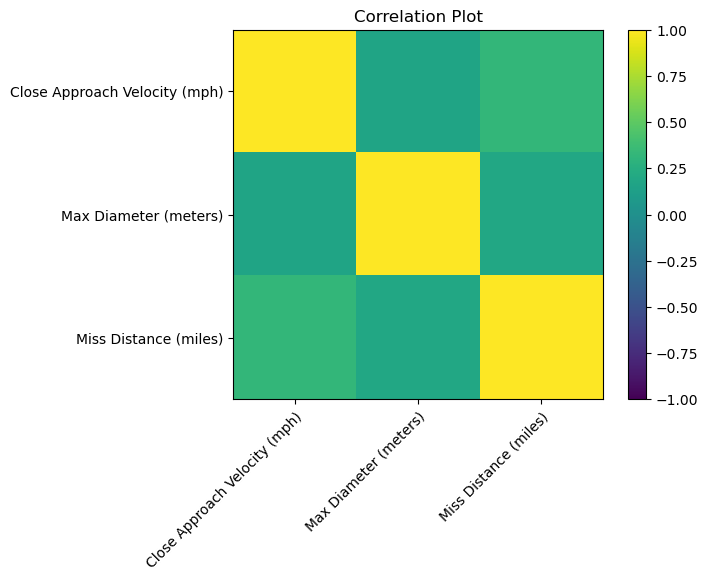

In [11]:
##---- correlation plots among the 3 predictors in our model (velocity, diameter, distance)
##---- seems like there might not be strong correlations between predictors, which is good! :)
# Create a figure and axis
fig, ax = plt.subplots()

# Create a correlation plot using Matplotlib's imshow function
cax = ax.imshow(correlation_matrix, cmap='viridis', vmin=-1, vmax=1)

# Add colorbar
cbar = fig.colorbar(cax)

# Set the labels and title
ax.set_xticks(np.arange(len(selected_columns)))
ax.set_yticks(np.arange(len(selected_columns)))
ax.set_xticklabels(selected_columns)
ax.set_yticklabels(selected_columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title('Correlation Plot')

# Show the plot
plt.show()

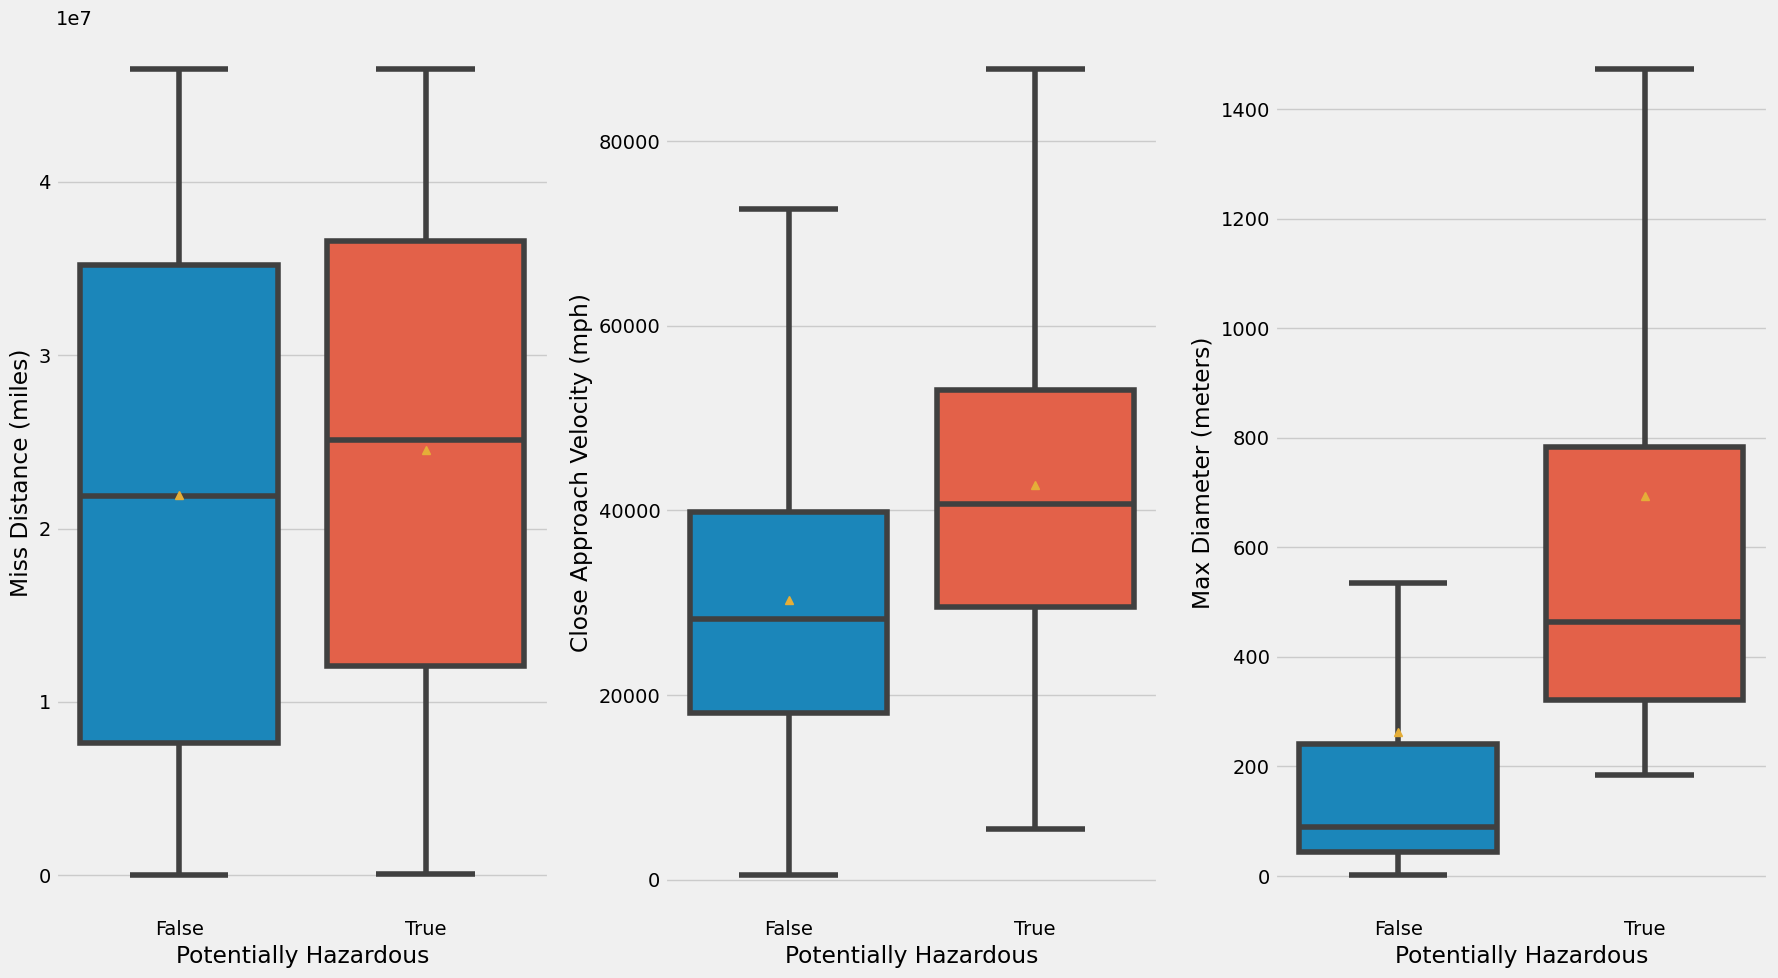

In [14]:
##---- Create 3 barplots for
##  "Miss Distance (miles) vs. Potentially Hazardous"
##  "Close Approach Velocity (mph) vs. Potentially Hazardous"
##  "Max Diameter (meters) vs. Potentially Hazardous" 

import seaborn as sns

# Set the "fivethirtyeight" style
plt.style.use('fivethirtyeight')

# Create a figure with three subplots for box plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))

# Box plot for Miss Distance (miles) vs. Potentially Hazardous with error bars and outliers
sns.boxplot(x='Potentially Hazardous', y='Miss Distance (miles)', data=earth_data, ax=axes[0], showmeans=True, whis=1.5, showfliers=False)

# Box plot for Close Approach Velocity (mph) vs. Potentially Hazardous with error bars and outliers
sns.boxplot(x='Potentially Hazardous', y='Close Approach Velocity (mph)', data=earth_data, ax=axes[1], showmeans=True, whis=1.5, showfliers=False)

# Box plot for Max Diameter (meters) vs. Potentially Hazardous with error bars and outliers
sns.boxplot(x='Potentially Hazardous', y='Max Diameter (meters)', data=earth_data, ax=axes[2], showmeans=True, whis=1.5, showfliers=False)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## From the below graphs, we can see that velocity and diameter are really important, 
## and maybe not so much with the distance, which lines up with the article that Brooke shared in Slack about 
## Asteroids vs. Comets.. I think..


In [37]:
##---- Inferential Analaysis
## Given that the dependent varioable (Potentially Hazardous) is binary, 
## the binomial logistic regression model was used, 
## and the model summary is below showing that all 3 predictors are statistically important 
## to determine the level of hazard of the asteroids to earth.

import statsmodels.api as sm

# Add a constant term to the predictors for the intercept
earth_data['intercept'] = 1

# Define the predictors and the dependent variable
X = earth_data[['intercept', 'Max Diameter (meters)', 'Close Approach Velocity (mph)', 'Miss Distance (miles)']]
y = earth_data['Potentially Hazardous']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the logistic regression summary
print(result.summary())

##---- Model summary:
## Given the z scores and p-values, the logistic regression model suggests that 
## 3 predictors are all statistically significant predictors of the likelihood of an object being Potentially Hazardous. 
## The pseudo R-squared value (0.08891) also shows a moderate level of goodness-of-fit.


Optimization terminated successfully.
         Current function value: 0.224803
         Iterations 7
                             Logit Regression Results                            
Dep. Variable:     Potentially Hazardous   No. Observations:                28595
Model:                             Logit   Df Residuals:                    28591
Method:                              MLE   Df Model:                            3
Date:                   Thu, 01 Feb 2024   Pseudo R-squ.:                 0.08891
Time:                           11:16:46   Log-Likelihood:                -6428.2
converged:                          True   LL-Null:                       -7055.6
Covariance Type:               nonrobust   LLR p-value:                1.009e-271
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                        -3.9610      

/var/folders/cd/rg2nggh16mj3s3f1rltt1h8h0000gn/T/ipykernel_10269/1772628804.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earth_data['intercept'] = 1


In [17]:
earth_data['Date'] = pd.to_datetime(earth_data['Date'])
earth_data['Year'] = earth_data['Date'].dt.year
earth_data.head(4)

/var/folders/cd/rg2nggh16mj3s3f1rltt1h8h0000gn/T/ipykernel_12916/301438868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earth_data['Date'] = pd.to_datetime(earth_data['Date'])
/var/folders/cd/rg2nggh16mj3s3f1rltt1h8h0000gn/T/ipykernel_12916/301438868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earth_data['Year'] = earth_data['Date'].dt.year


,id,Asteroid Name,Potentially Hazardous,Miss Distance (miles),Orbiting Body,Close Approach Velocity (mph),Date,Max Diameter (meters),Year
0,2000433,433 Eros (A898 PA),False,29274494.77,Earth,12478.81,1900-12-27,48982.39,1900
2,2000887,887 Alinda (A918 AA),False,29796347.90,Earth,15221.64,1910-01-04,9954.97,1910
4,2001221,1221 Amor (1932 EA1),False,26496951.95,Earth,29682.27,1900-03-08,1986.28,1900
5,2001566,1566 Icarus (1949 MA),True,7853232.21,Earth,60414.37,1902-06-11,2857.85,1902


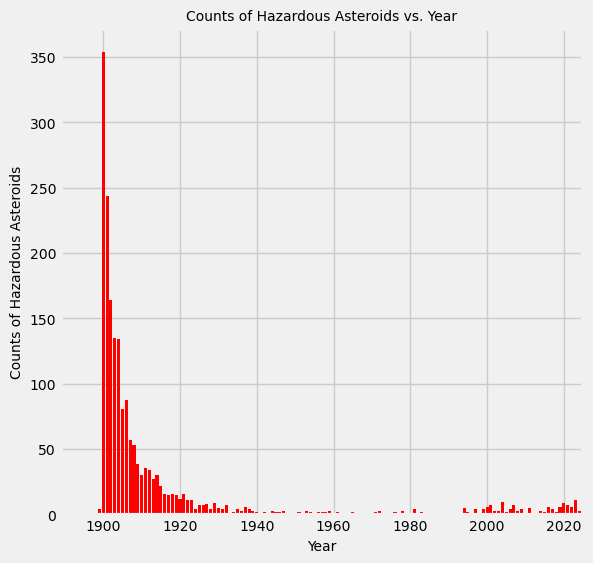

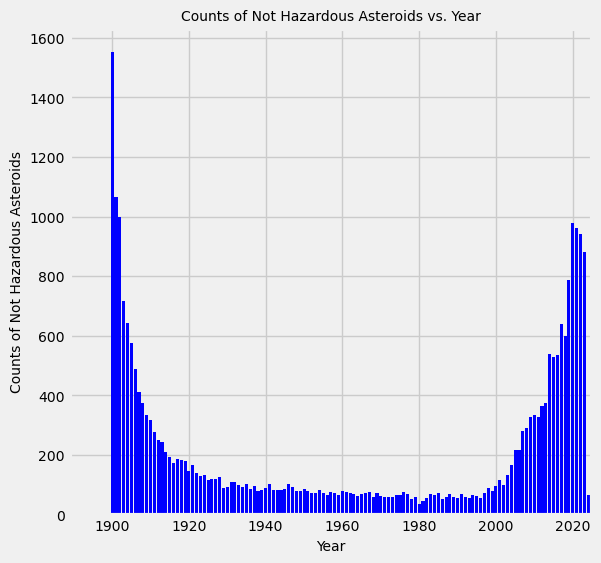

In [73]:
##---- line graphs for year column between the hazardous vs. not hazardous asteroids


dangerous = earth_data.loc[earth_data['Potentially Hazardous'],:]
dangerous.head(3)

Ndangerous = earth_data.loc[~earth_data['Potentially Hazardous'],:]
Ndangerous.head(3)

# Dangerous asteroids vs. Year
DC=dangerous.Year.value_counts()
plt.figure(figsize=(6,6))
plt.bar(DC.index, DC, color="red")
plt.xlim(min(DC.index)-10, 2025)
plt.title("Counts of Hazardous Asteroids vs. Year", fontsize="10")
plt.xlabel("Year", fontsize=10)
plt.ylabel("Counts of Hazardous Asteroids", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Not dangerous asteroids vs. Year
NC=Ndangerous.Year.value_counts()
plt.figure(figsize=(6,6))
plt.bar(NC.index, NC, color="blue")
plt.xlim(min(NC.index)-10, 2025)
plt.title("Counts of Not Hazardous Asteroids vs. Year", fontsize="10")
plt.xlabel("Year", fontsize=10)
plt.ylabel("Counts of Not Hazardous Asteroids", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()